In [367]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [392]:
def true_relation(z):
    A, B, C = 3.7, 0.1, 2.1 # True parabola parameters
    return A*z**2 + B*z + C

In [393]:
def generate_data(samples_num:int=200, eps_dev: float=20):
    x = np.linspace(0.1, 10, samples_num)
    y = true_relation(x)
    y_n = np.abs(y + np.random.normal(scale=eps_dev,size=(samples_num,)))
    return x, y, y_n

In [271]:
def plot_data(x, y_true, y_noise, y_pred=None):
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.plot(x, y_true,'g', label='true data')
    ax.scatter(x, y_noise, s=5, label='true data with noise')
    if y_pred is not None:
        ax.plot(x, y_pred,'r',label='predicted data')
    
    ax.set_ylabel('Land\'s Price')
    ax.set_xlabel('Land\'s side length')
    
    ax.set_xticks(np.linspace(0,10,11))
    #ax.set_xticklabels(np.linspace(0,10,11))
    ax.grid(True)
    
    ax.legend()
    
    ax.set_title('Data (Green line is true data, dots are noisy observations)')
    
    return ax

In [272]:
x, y, y_noise = generate_data()

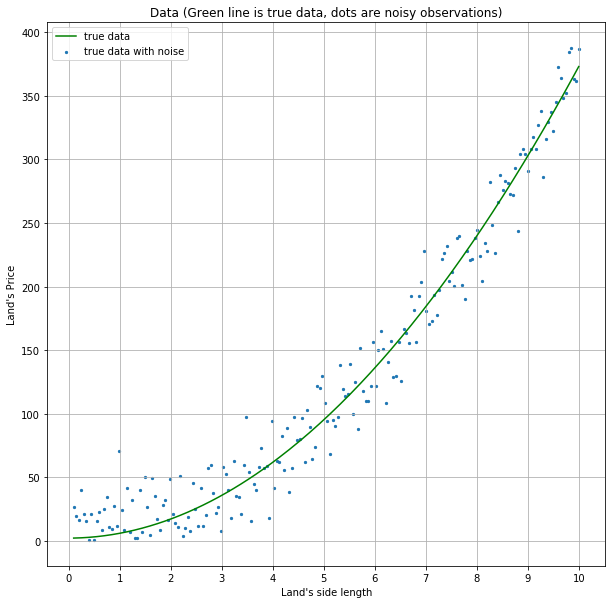

In [331]:
ax = plot_data(x, y, y_noise)

In [334]:
from sklearn.preprocessing import PolynomialFeatures

In [335]:
model = LinearRegression(fit_intercept=False)

In [336]:
poly = PolynomialFeatures(degree=10)

In [337]:
x, y, y_noise = generate_data(samples_num=20, eps_dev=15)
x.shape

(20,)

In [338]:
X2 = poly.fit_transform(x.reshape(-1,1)) #we have 200 samples and 1 feature, so we reshape it accordingly.
X2.shape

(20, 11)

In [339]:
model.fit(X2,y_noise)
model.coef_

array([  6.473,  27.776, -40.847,   4.052,  20.13 , -13.946,   4.45 ,
        -0.798,   0.082,  -0.005,   0.   ])

In [340]:
y_pred = model.predict(X2)

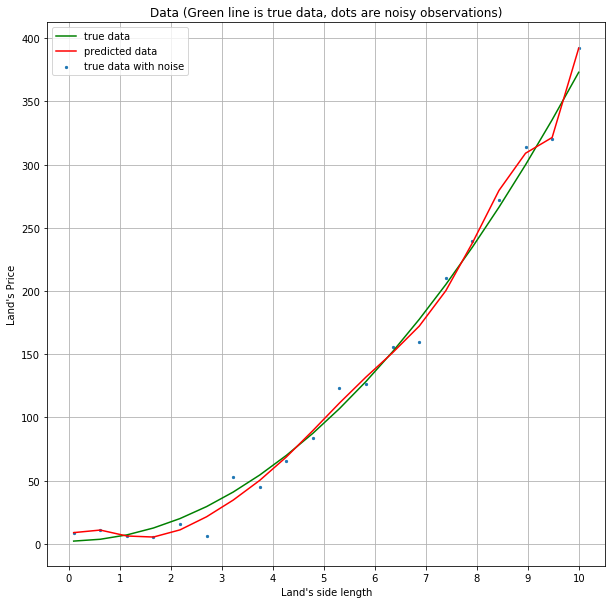

In [341]:
plot_data(x,y,y_noise,y_pred)

In [510]:
def fit_and_predict(model, polynom_degree=10, x_point=5):
    x, y, y_noise = generate_data(samples_num=500,eps_dev=30)
    poly = PolynomialFeatures(degree=polynom_degree)
    x1 = poly.fit_transform(x.reshape(-1,1))
    model.fit(x1,y_noise)
    x_point_polynomialed = poly.transform(np.array(x_point).reshape(-1,1))
    pred = model.predict(x_point_polynomialed)
    return pred

In [537]:
def experiment(model,max_experiment_num = 1000, max_polynomial_degree = 10, point = 7):
    y_predictions_matr=np.zeros((max_polynomial_degree,max_experiment_num))

    for pol_degree in range(max_polynomial_degree):
        for e in range(max_experiment_num):
            y_predictions_matr[pol_degree,e]=fit_and_predict(model,polynom_degree=pol_degree+1, x_point=point)
        
    y_pred_df = pd.DataFrame(index=['pol_deg_'+str(i+1) for i in range(y_predictions_matr.shape[0])])
    y_pred_df['y_true'] = true_relation(point)
    y_pred_df['pred_mean']=y_predictions_matr.mean(axis=1)
    y_pred_df['bias'] = y_pred_df['y_true'] - y_pred_df['pred_mean']
    y_pred_df['var']=y_predictions_matr.std(axis=1)
    
    fg, ax_list = plt.subplots(5,2,figsize=(15, 20))
    ax_list = ax_list.ravel()
    for i in range(max_polynomial_degree):
        label_str = 'Polynom degree {} \nPred_mean {:.2f} \nBias {:.2f} \nVar {:.2f}'.format(
            i+1,y_pred_df['pred_mean'][i],
            y_pred_df['bias'][i],
            y_pred_df['var'][i]
        )
        sns.distplot(y_predictions_matr[i,:], ax=ax_list[i], label=label_str)
        ax_list[i].scatter([true_relation(point)],[0],s=30,c='g',marker='x',label='y_true {:.2f}'.format(y_pred_df['y_true'][i]))
        ax_list[i].legend()
    return y_pred_df, y_predictions_matr


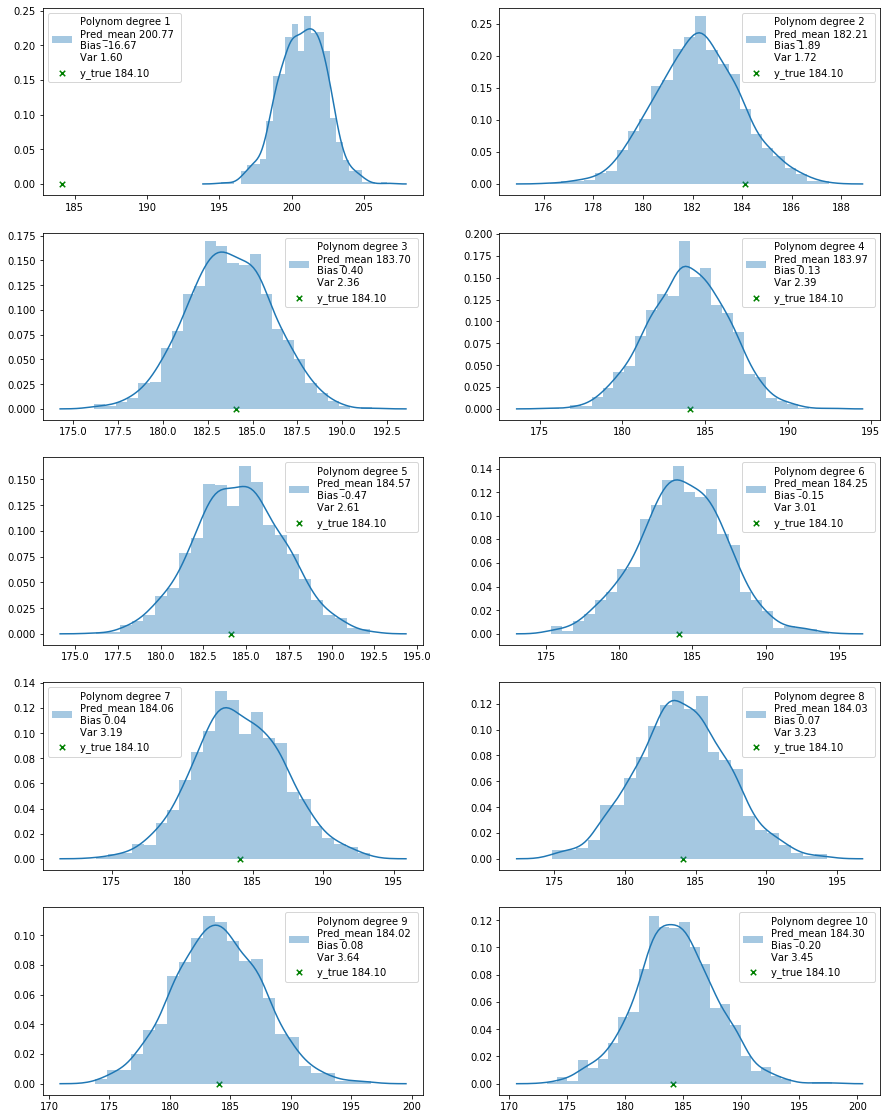

In [539]:
y_metrics, y_pred = experiment(model)

In [540]:
y_metrics

,y_true,pred_mean,bias,var
pol_deg_1,184.1,200.773323,-16.673323,1.604170
pol_deg_2,184.1,182.210881,1.889119,1.717467
pol_deg_3,184.1,183.702970,0.397030,2.361057
pol_deg_4,184.1,183.973566,0.126434,2.386222
pol_deg_5,184.1,184.571457,-0.471457,2.605136
pol_deg_6,184.1,184.248917,-0.148917,3.006949
pol_deg_7,184.1,184.059947,0.040053,3.187325
pol_deg_8,184.1,184.031395,0.068605,3.229490
pol_deg_9,184.1,184.022004,0.077996,3.644681
pol_deg_10,184.1,184.304184,-0.204184,3.454916
